In [1]:
import pandas as pd

# Load the CSV data into a DataFrame
jokes_df = pd.read_csv('jokes_dataset.csv')

# print the first 5 rows of the DataFrame
print(jokes_df.head())


                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False


In [2]:
# Display the DataFrame
jokes_df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [3]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


200k different jokes in a dataframe with target 'humor' column of boolean type. 

In [4]:
jokes_df.isnull().sum()

text     0
humor    0
dtype: int64

No null values.

In [5]:
print(len(jokes_df['text'].unique()))

200000


There are no duplicate jokes.

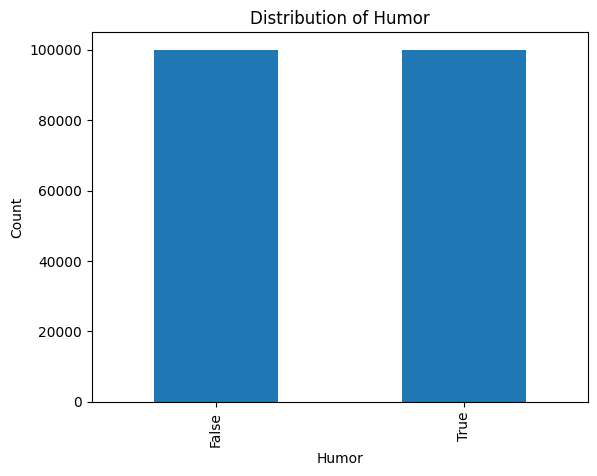

In [6]:
import matplotlib.pyplot as plt

# Count the number of True and False values in the 'humor' column
humor_counts = jokes_df['humor'].value_counts()

# Create a bar chart of the counts
humor_counts.plot(kind='bar')

# Set the x and y labels and title
plt.xlabel('Humor')
plt.ylabel('Count')
plt.title('Distribution of Humor')

# Show the plot
plt.show()

Balanced dataset so no SMOTE or over/undersampling needed.

In [7]:
import nltk
from nltk.corpus import stopwords
import string
import re

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['clean_joke'] = jokes_df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

# Define a function to remove punctuation
def remove_punctuation(text):
    # Define the regular expression pattern to match any punctuation character
    pattern = r'[^\w\s]'

    # Use the sub() function to replace any matches with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:

# Preprocess the jokes
preprocess_jokes(jokes_df)

# Apply the remove_punctuation function to the Clean_joke column
jokes_df['clean_joke'] = jokes_df['clean_joke'].apply(remove_punctuation)


In [10]:
jokes_df.head()

,text,humor,clean_joke
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rules 2020 bid guys im running
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch
2,What do you call a turtle without its shell? d...,True,call turtle without shell dead
3,5 reasons the 2016 election feels so personal,False,5 reasons 2016 election feels personal
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...


In [13]:

humorous_jokes_df = jokes_df[jokes_df['humor'] == True]


In [14]:
humorous_jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         100000 non-null  object
 1   humor        100000 non-null  bool  
 2   clean_joke   100000 non-null  object
 3   joke_length  100000 non-null  int64 
dtypes: bool(1), int64(1), object(2)
memory usage: 3.1+ MB


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

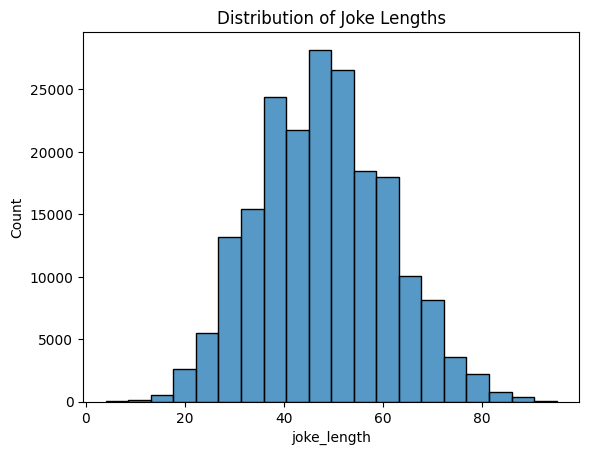

In [16]:
# Visualize the distribution of joke lengths
jokes_df['joke_length'] = jokes_df['clean_joke'].apply(lambda x: len(x))
sns.histplot(data=jokes_df, x='joke_length', bins=20)
plt.title('Distribution of Joke Lengths')
plt.show()

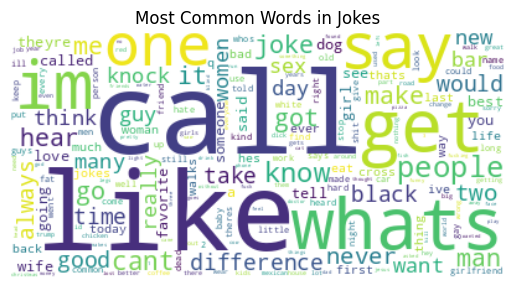

In [19]:
from collections import Counter
from wordcloud import WordCloud

# Get all jokes from humorous_jokes_df
all_jokes = ' '.join(humorous_jokes_df['clean_joke'])

# Create a counter for word counts
word_counts = Counter(all_jokes.split())

# Generate wordcloud from word counts
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)

# Plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Jokes')
plt.show()


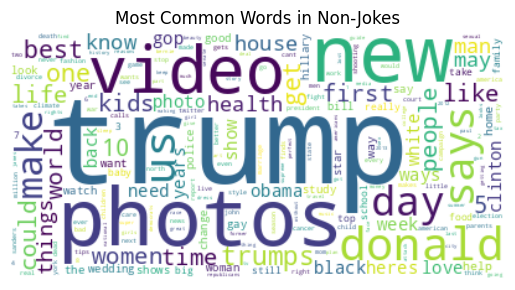

In [20]:
# Subset dataframe for humor = False
jokes_humor_false = jokes_df[jokes_df['humor'] == False]
all_jokes_humor_false = ' '.join(jokes_humor_false['clean_joke'])
word_counts_humor_false = Counter(all_jokes_humor_false.split())
wordcloud_humor_false = WordCloud(background_color='white').generate_from_frequencies(word_counts_humor_false)
plt.imshow(wordcloud_humor_false, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Non-Jokes')
plt.show()

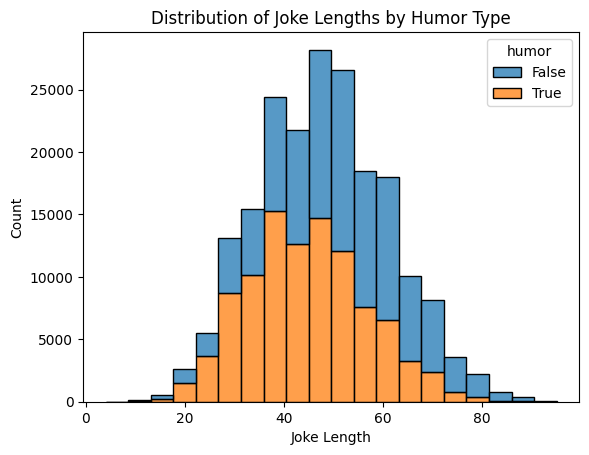

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=jokes_df, x='joke_length', bins=20, hue='humor', multiple='stack')
plt.title('Distribution of Joke Lengths by Humor Type')
plt.xlabel('Joke Length')
plt.ylabel('Count')
plt.show()
